# Exploratory Data Analysis Part 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
shot_data = pd.read_csv("C:/Users/josh1/ISYE 6740/NBA_2004_2023_Shots.csv")
game_data = pd.read_csv("C:/Users/josh1/ISYE 6740/games.csv")

In [3]:
game_data = game_data.drop_duplicates(subset='GAME_ID', keep='first')
game_data['Score_Difference'] = abs(game_data['PTS_home'] - game_data['PTS_away'])

In [4]:
merged_data = shot_data.merge(game_data[['GAME_ID','Score_Difference','HOME_TEAM_ID']],how='left', on='GAME_ID')
merged_data['home'] = merged_data['HOME_TEAM_ID'] == merged_data['TEAM_ID']
merged_data.loc[merged_data['PLAYER_NAME'] == 'O.G. Anunoby', 'POSITION'] = 'SF'
merged_data.loc[merged_data['PLAYER_NAME'] == 'OG Anunoby', 'POSITION'] = 'SF'
merged_data.loc[merged_data['PLAYER_NAME'] == 'O.G. Anunoby', 'POSITION_GROUP'] = 'F'
merged_data.loc[merged_data['PLAYER_NAME'] == 'OG Anunoby', 'POSITION_GROUP'] = 'F'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Jeff Dowtin Jr.', 'POSITION'] = 'PG'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Jeff Dowtin Jr.', 'POSITION_GROUP'] = 'G'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Jeff Dowtin', 'POSITION'] = 'PG'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Jeff Dowtin', 'POSITION_GROUP'] = 'G'
merged_data.loc[merged_data['PLAYER_NAME'] == 'John Butler Jr.', 'POSITION'] = 'PF'
merged_data.loc[merged_data['PLAYER_NAME'] == 'John Butler Jr.', 'POSITION_GROUP'] = 'F'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Chance Comanche', 'POSITION'] = 'C'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Chance Comanche', 'POSITION_GROUP'] = 'C'
merged_data.loc[merged_data['PLAYER_NAME'] == 'AJ Green', 'POSITION'] = 'SG'
merged_data.loc[merged_data['PLAYER_NAME'] == 'AJ Green', 'POSITION_GROUP'] = 'G'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Xavier Tillman', 'POSITION'] = 'C'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Xavier Tillman', 'POSITION_GROUP'] = 'C'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Xavier Tillman Sr.', 'POSITION'] = 'C'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Xavier Tillman Sr.', 'POSITION_GROUP'] = 'C'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Charlie Brown Jr.', 'POSITION'] = 'SG'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Charlie Brown Jr.', 'POSITION_GROUP'] = 'G'
merged_data.loc[merged_data['PLAYER_NAME'] == 'M.J. Walker', 'POSITION'] = 'SG'
merged_data.loc[merged_data['PLAYER_NAME'] == 'M.J. Walker', 'POSITION_GROUP'] = 'G'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Trevon Scott', 'POSITION'] = 'SF'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Trevon Scott', 'POSITION_GROUP'] = 'F'
merged_data.loc[merged_data['PLAYER_NAME'] == 'P.J. Dozier', 'POSITION'] = 'SG'
merged_data.loc[merged_data['PLAYER_NAME'] == 'P.J. Dozier', 'POSITION_GROUP'] = 'G'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Cam Reynolds', 'POSITION'] = 'SF'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Cam Reynolds', 'POSITION_GROUP'] = 'F'
merged_data.loc[merged_data['PLAYER_NAME'] == 'T.J. Leaf', 'POSITION'] = 'PF'
merged_data.loc[merged_data['PLAYER_NAME'] == 'T.J. Leaf', 'POSITION_GROUP'] = 'F'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Michael Frazier II', 'POSITION'] = 'SG'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Michael Frazier II', 'POSITION_GROUP'] = 'G'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Jeffery Taylor', 'POSITION'] = 'SF'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Jeffery Taylor', 'POSITION_GROUP'] = 'F'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Vitor Faverani', 'POSITION'] = 'C'
merged_data.loc[merged_data['PLAYER_NAME'] == 'Vitor Faverani', 'POSITION_GROUP'] = 'C'

In [5]:
def foot_conv(x,y):
    distance = np.sqrt((x - 0)**2 + (y - 4)**2).astype(int)
    for i in range(len(distance)):
        if y[i]<4: distance[i]= -distance[i]
    
    # If y is less than 4, return the distance multiplied by -1
    return distance

In [5]:
df = merged_data.copy()
# df["time_left_quarter"] = df["MINS_LEFT"] * 60 + df["SECS_LEFT"]
# df["TIME_LEFT_GAME"] = (4 - df["QUARTER"]) * 12 * 60 + df["time_left_quarter"]

df["TIME_LEFT_QUARTER"] = df["MINS_LEFT"] * 60 + df["SECS_LEFT"]
df["TIME_LEFT_GAME"] = (4 - df["QUARTER"]) * 15 * 60 + df["TIME_LEFT_QUARTER"]
df["GAME_DATE"] = pd.to_datetime(df["GAME_DATE"])
# df['SHOT_DISTANCE'] = foot_conv(df['LOC_X'],df['LOC_Y'])


## 1. Score Difference 

In [13]:
dif = df.groupby(['Score_Difference'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
dif.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
dif.head()

,Score_Difference,Frequency,Accuracy
0,1.0,162184,0.453349
1,2.0,208868,0.453507
2,3.0,226350,0.453855
3,4.0,224708,0.453482
4,5.0,252164,0.454593


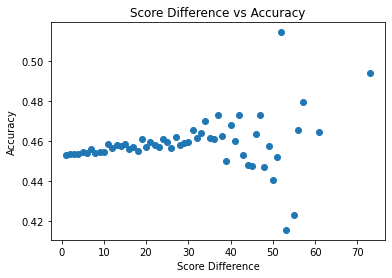

In [11]:
plt.scatter(dif['Score_Difference'],dif['Accuracy'])
plt.title('Score Difference vs Accuracy')
plt.xlabel("Score Difference")
plt.ylabel("Accuracy")
plt.show()

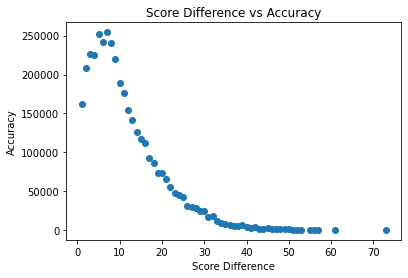

In [12]:
plt.scatter(dif['Score_Difference'],dif['Frequency'])
plt.title('Score Difference vs Accuracy')
plt.xlabel("Score Difference")
plt.ylabel("Accuracy")
plt.show()

## 2. 2PT vs 3PT Over Seasons

In [14]:
season = df.groupby(['SEASON_2','SHOT_TYPE'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
season.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
season.head()

,SEASON_2,SHOT_TYPE,Frequency,Accuracy
0,2003-04,2PT Field Goal,154310,0.459679
1,2003-04,3PT Field Goal,35493,0.347167
2,2004-05,2PT Field Goal,158878,0.469908
3,2004-05,3PT Field Goal,38748,0.355554
4,2005-06,2PT Field Goal,155001,0.477932


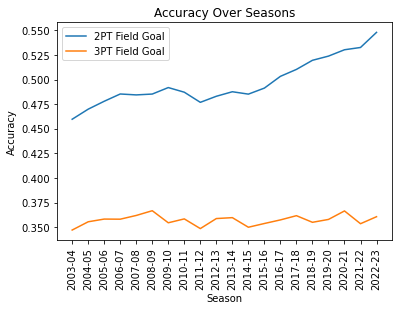

In [20]:
for shot_type, group in season.groupby('SHOT_TYPE'):
    plt.plot(group['SEASON_2'], group['Accuracy'], label=f'{shot_type}')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Seasons')

# Show legend
plt.legend()
plt.xticks(rotation=90)

# Display the plot
plt.show()

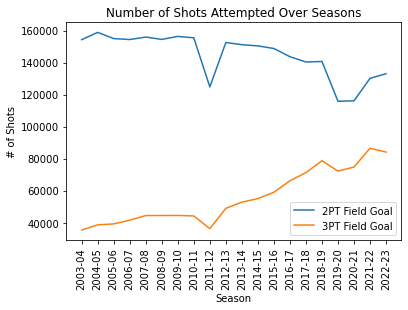

In [19]:
for shot_type, group in season.groupby('SHOT_TYPE'):
    plt.plot(group['SEASON_2'], group['Frequency'], label=f'{shot_type}')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('# of Shots')
plt.title('Number of Shots Attempted Over Seasons')

# Show legend
plt.legend()
plt.xticks(rotation=90)

# Display the plot
plt.show()

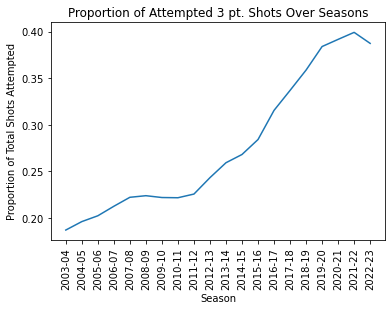

In [21]:
a, b =  season.groupby('SHOT_TYPE')
aa = a[1]
aa = aa.reset_index() 
bb=b[1] 
bb=bb.reset_index() 
plt.plot(aa['SEASON_2'], bb['Frequency']/(aa['Frequency']+bb['Frequency']))

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Proportion of Total Shots Attempted')
plt.title('Proportion of Attempted 3 pt. Shots Over Seasons')

plt.xticks(rotation=90)

# Display the plot
plt.show()

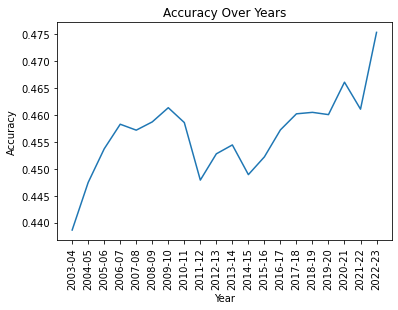

In [23]:
plt.plot(aa['SEASON_2'], (aa['Frequency']*aa['Accuracy']+bb['Frequency']
                          *bb['Accuracy'])/(aa['Frequency']+bb['Frequency']))

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Years')

plt.xticks(rotation=90)

# Display the plot
plt.show()

## 3. Shot Distance

In [30]:
rang = df.groupby(df['SHOT_DISTANCE'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
rang.rename(columns={'SHOT_DISTANCE':'Distance (ft.)','count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
# rang = rang.sort_values(by='percentage_made', ascending=False).reset_index(drop=True)
rr = rang[rang['Frequency']>=100]
rr.sort_values(by='Accuracy', ascending=False).reset_index(drop=True).head()

,Distance (ft.),Frequency,Accuracy
0,0,603348,0.661752
1,1,320007,0.654773
2,2,234435,0.533069
3,3,121546,0.420343
4,16,112469,0.408815


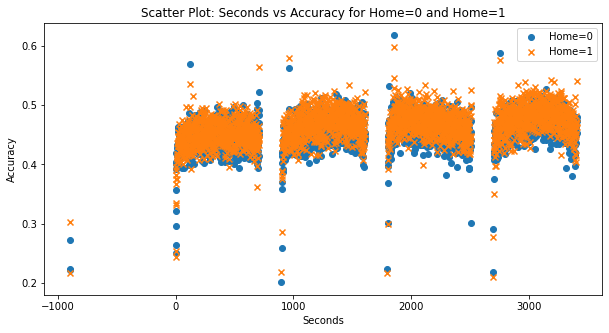

In [31]:
rang = df.groupby(['TIME_LEFT_GAME','home'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
rang.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
# rang = rang.sort_values(by='percentage_made', ascending=False).reset_index(drop=True)
rr = rang[rang['Frequency']>=100]
plt.figure(figsize=(10,5))

home_0 = rr[rr['home'] == 0]
home_1 =rr[rr['home'] == 1]

# Create a scatter plot
plt.scatter(home_0['TIME_LEFT_GAME'], home_0['Accuracy'], label='Home=0', marker='o')
plt.scatter(home_1['TIME_LEFT_GAME'], home_1['Accuracy'], label='Home=1', marker='x')

# Add labels and title
plt.xlabel('Seconds')
plt.ylabel('Accuracy')
plt.title('Scatter Plot: Seconds vs Accuracy for Home=0 and Home=1')

# Add legend
plt.legend()

# Show the plot
plt.show()

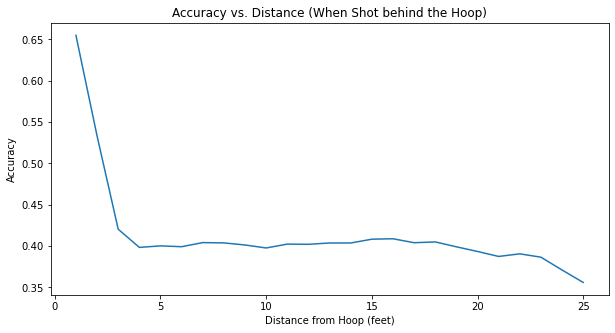

<Figure size 5760x1440 with 0 Axes>

In [50]:
behind_hoop = df.groupby('SHOT_DISTANCE').filter(lambda x: (x['LOC_Y'] < 4).any())
behind_hoop = behind_hoop.groupby('SHOT_DISTANCE')['SHOT_MADE'].agg(['count', 'mean']).reset_index()
behind_hoop.rename(columns={'count': 'Frequency', 'mean': 'percentage_made'}, inplace=True)

plt.figure(figsize=(10,5))
plt.plot(behind_hoop['SHOT_DISTANCE'],behind_hoop['percentage_made'])
plt.title("Accuracy vs. Distance (When Shot behind the Hoop)")
plt.xlabel("Distance from Hoop (feet)")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 26, step=5))
plt.figure(figsize=(80,20))
plt.show()


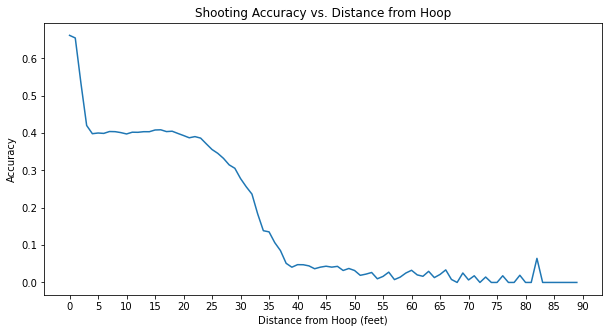

<Figure size 5760x1440 with 0 Axes>

In [53]:
rang = df.groupby('SHOT_DISTANCE')['SHOT_MADE'].agg(['count', 'mean']).reset_index()
rang.rename(columns={'count': 'Frequency', 'mean': 'percentage_made'}, inplace=True)
# rang_subset = rang[rang['Frequency']>=100]

plt.figure(figsize=(10,5))
plt.plot(rang['SHOT_DISTANCE'],rang['percentage_made'])
plt.title("Shooting Accuracy vs. Distance from Hoop")
plt.xlabel("Distance from Hoop (feet)")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, 91, step=5))
plt.figure(figsize=(80,20))
plt.show()

## 4. Shot Distance vs Basic Zone

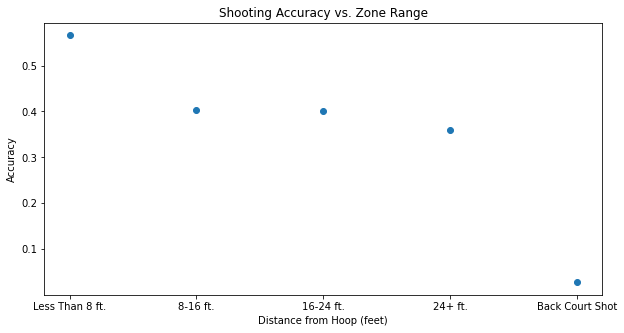

<Figure size 5760x1440 with 0 Axes>

In [54]:
range_zone = df.groupby('ZONE_RANGE')['SHOT_MADE'].agg(['count', 'mean']).reset_index()
range_zone.rename(columns={'count': 'Frequency', 'mean': 'percentage_made'}, inplace=True)
range_zone = range_zone.sort_values(by='percentage_made', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10,5))

plt.scatter(range_zone['ZONE_RANGE'],range_zone['percentage_made'])
plt.title("Shooting Accuracy vs. Zone Range")
plt.xlabel("Distance from Hoop (feet)")
plt.ylabel("Accuracy")
plt.figure(figsize=(80,20))
plt.show()

## 5. Shot Distance and Position 

In [61]:
rang_pos = df.groupby(['SHOT_DISTANCE', 'POSITION'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
rang_pos.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
rang_pos = rang_pos.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
rang_pos_over_1000_shots = rang_pos[rang_pos['Frequency']>=1000].reset_index(drop=True)
rang_pos_over_1000_shots

,SHOT_DISTANCE,POSITION,Frequency,Accuracy
0,0,C,155314,0.697284
1,1,C,74172,0.681187
2,0,PF,136122,0.675695
3,1,PF,67116,0.669274
4,0,SF,105125,0.668414
...,...,...,...,...
158,30,PG,1696,0.283608
159,29,PF,1034,0.281431
160,29,SF,1359,0.279617
161,31,PG,1010,0.279208


In [87]:
rang_pos = df.groupby(['SHOT_DISTANCE', 'POSITION','home'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
rang_pos.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
rang_pos = rang_pos.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
rang_pos_over_100_shots = rang_pos[rang_pos['Frequency']>=100].reset_index(drop=True)
rang_pos_over_100_shots

,SHOT_DISTANCE,POSITION,home,Frequency,Accuracy
0,1,PF-C,True,219,0.726027
1,0,C,False,76940,0.698973
2,1,C-PF,False,250,0.696000
3,1,C-PF,True,253,0.695652
4,0,C,True,78374,0.695626
...,...,...,...,...,...
614,39,SG,True,112,0.035714
615,40,PG,False,170,0.035294
616,49,PG,False,101,0.029703
617,39,SG,False,107,0.028037


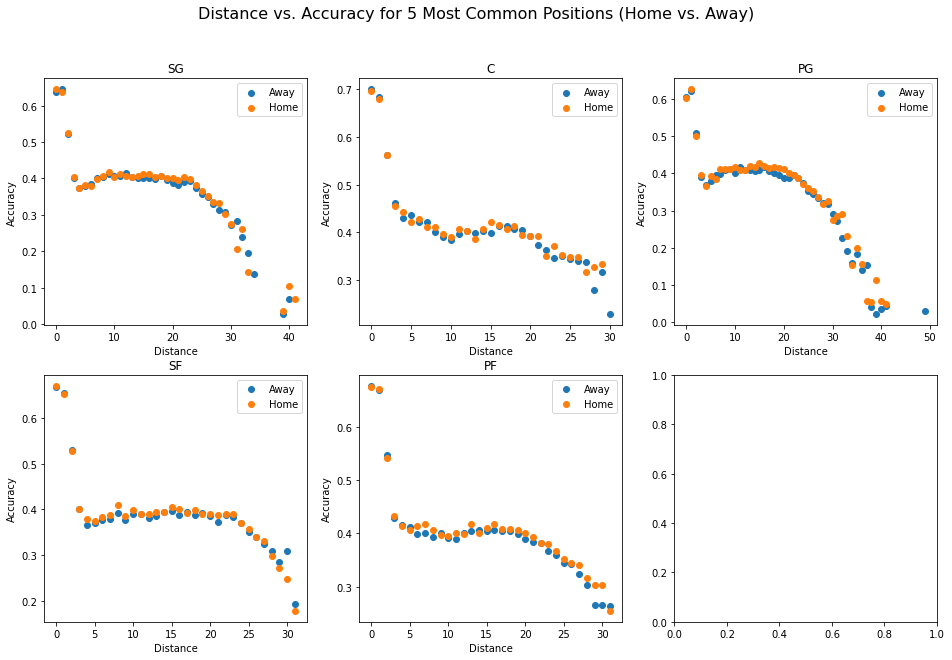

In [88]:
fig, axes = plt.subplots(2,3,figsize=(16, 10))
i = 0
for i,p in enumerate(df['POSITION'].unique()[:5]):
    model=rang_pos_over_100_shots[rang_pos_over_100_shots['POSITION']==p]
    model0 = model[model['home']==0]
    model1 = model[model['home']==1]
    row, col = divmod(i, 3)
    axes[row, col].scatter(model0['SHOT_DISTANCE'],model0['Accuracy'], label="Away")
    axes[row, col].scatter(model1['SHOT_DISTANCE'],model1['Accuracy'], label='Home')
    axes[row, col].set_title(f"{p}")
    axes[row,col].set_xlabel('Distance')
    axes[row,col].set_ylabel('Accuracy')
    axes[row,col].legend()
#     axes[row, col].legend()
#     plt.title("Shooting Accuracy vs. Distance from Hoop")
#     axes[row, col].xlabel("Distance from Hoop (feet)")
#     axes[row, col].ylabel("Accuracy")
#     axes[row, col].set_xticks(np.arange(-25, 76, step=5))
# fig.text(0.5, 0.04, 'Value', ha='center', va='center', fontsize=14)
# fig.text(0.06, 0.5, 'Frequency', ha='center', va='center', rotation='vertical', fontsize=14)
fig.suptitle('Distance vs. Accuracy for 5 Most Common Positions (Home vs. Away)', fontsize=16)

plt.show()

In [96]:
rang_pos_gp = df.groupby(['SHOT_DISTANCE', 'POSITION_GROUP'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
rang_pos_gp.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)

rpg = rang_pos_gp[rang_pos_gp['Frequency']>=100]
rang_pos_gp


,SHOT_DISTANCE,POSITION_GROUP,Frequency,Accuracy
0,0,C,157120,0.696258
1,0,F,247105,0.671690
2,0,G,199123,0.622193
3,1,C,74675,0.681286
4,1,F,121355,0.662016
...,...,...,...,...
263,88,F,2,0.000000
264,88,G,2,0.000000
265,89,C,1,0.000000
266,89,F,2,0.000000


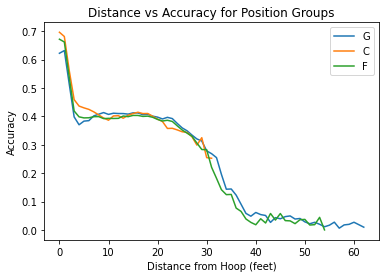

In [97]:
for p in df['POSITION_GROUP'].unique():
    model = rpg[rpg['POSITION_GROUP']==p]
    plt.plot(model['SHOT_DISTANCE'],model['Accuracy'], label=f"{p}")
    plt.title("Distance vs Accuracy for Position Groups")
#     plt.title("Shooting Accuracy vs. Distance from Hoop")
    plt.xlabel("Distance from Hoop (feet)")
    plt.ylabel("Accuracy")
#     plt.xticks(np.arange(-25, 76, step=5))
plt.legend()
plt.show()

## 6. Position vs Zone

In [98]:
pos = df.groupby(['POSITION_GROUP', 'BASIC_ZONE'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
pos.rename(columns={'count': 'frequency', 'mean': 'percentage_made'}, inplace=True)
pos = pos.sort_values(by='percentage_made', ascending=False).reset_index(drop=True)
ppp = pos[pos['frequency']>=100]
pos

,POSITION_GROUP,BASIC_ZONE,frequency,percentage_made
0,C,Restricted Area,311727,0.648664
1,F,Restricted Area,502320,0.622657
2,G,Restricted Area,465289,0.580029
3,C,In The Paint (Non-RA),137633,0.423903
4,G,In The Paint (Non-RA),240242,0.401836
5,G,Mid-Range,470580,0.401568
6,F,In The Paint (Non-RA),223215,0.400883
7,C,Mid-Range,141122,0.397876
8,F,Mid-Range,401550,0.394384
9,G,Right Corner 3,68498,0.393778


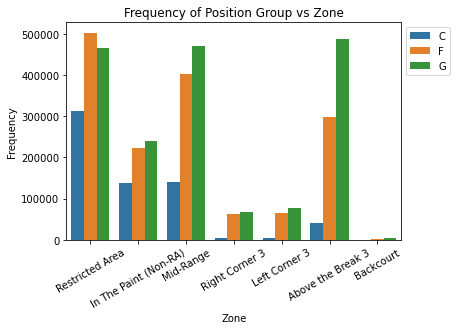

In [104]:
import seaborn as sns
sns.barplot(x=pos['BASIC_ZONE'], y=pos["frequency"],hue=pos['POSITION_GROUP'])
plt.title(f"Frequency of Position Group vs Zone")
plt.xlabel("Zone")
plt.ylabel("Frequency")
plt.xticks(rotation=30)
# plt.legend(bar, df['POSITION_GROUP'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

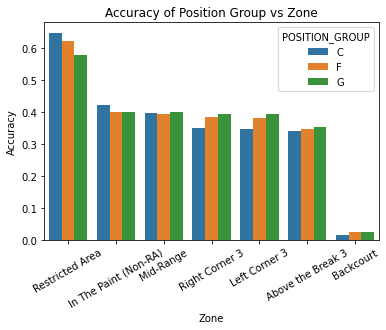

In [102]:
sns.barplot(x=pos['BASIC_ZONE'], y=pos["percentage_made"],hue=pos['POSITION_GROUP'])
plt.title(f"Accuracy of Position Group vs Zone")
plt.xlabel("Zone")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()

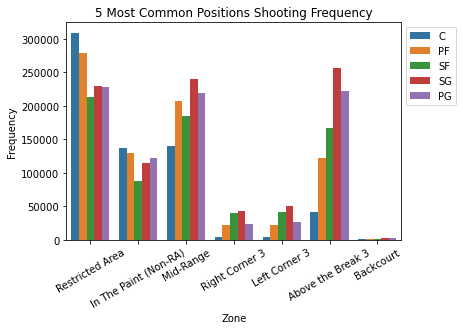

In [109]:
pos = df.groupby(['POSITION', 'BASIC_ZONE'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
pos.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
pos = pos.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
pos = pos[pos['POSITION'].isin(['SG', 'C', 'PG', 'SF', 'PF'])]
sns.barplot(x=pos['BASIC_ZONE'], y=pos["Frequency"],hue=pos['POSITION'])
plt.xlabel("Zone")
plt.ylabel("Frequency")
plt.xticks(rotation=30)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("5 Most Common Positions Shooting Frequency")
plt.show()

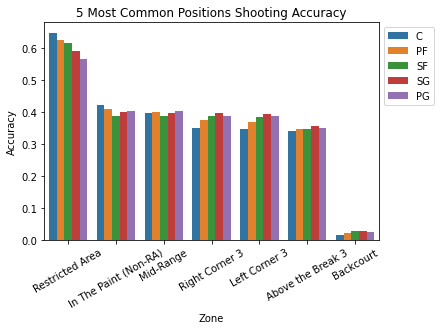

In [110]:
sns.barplot(x=pos['BASIC_ZONE'], y=pos["Accuracy"],hue=pos['POSITION'])
plt.title("5 Most Common Positions Shooting Accuracy")
plt.xlabel("Zone")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

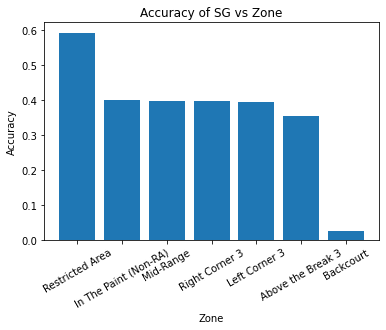

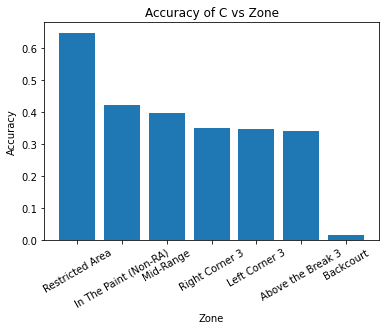

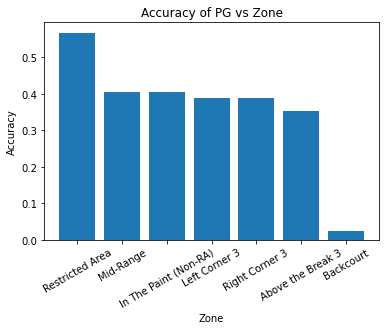

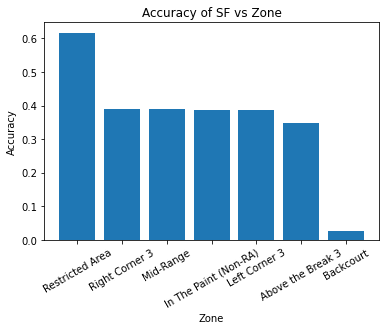

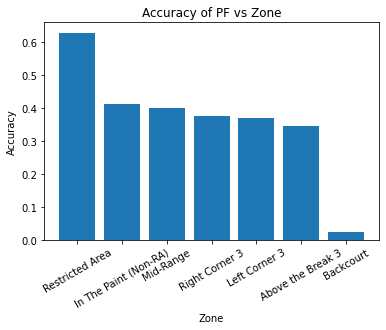

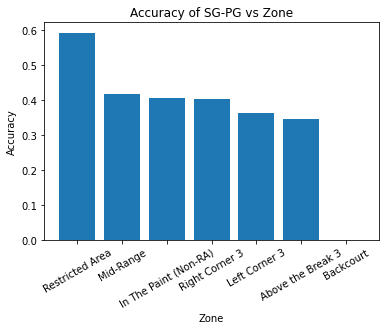

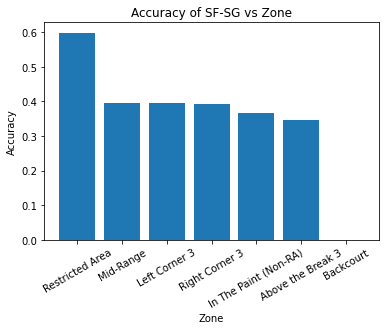

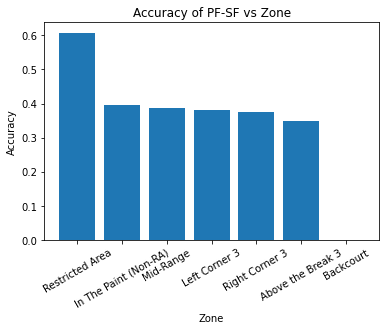

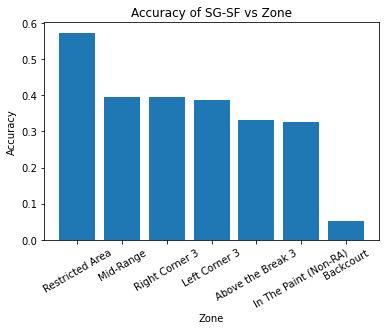

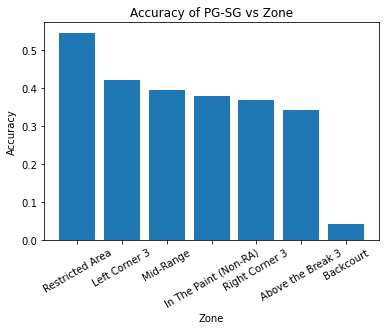

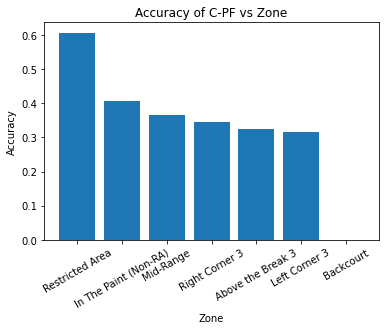

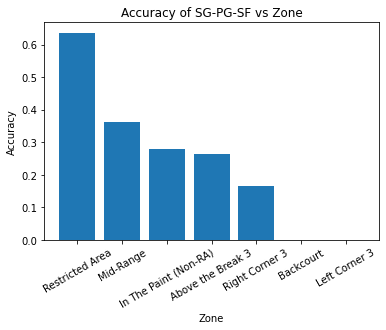

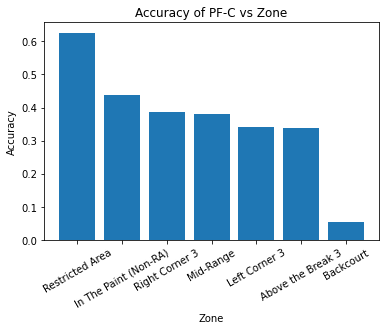

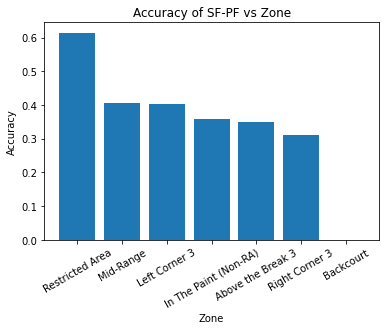

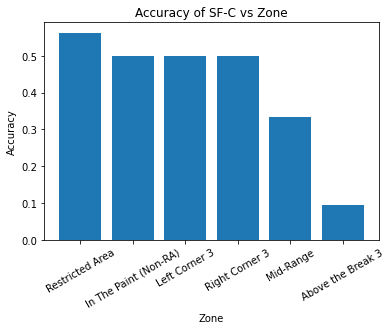

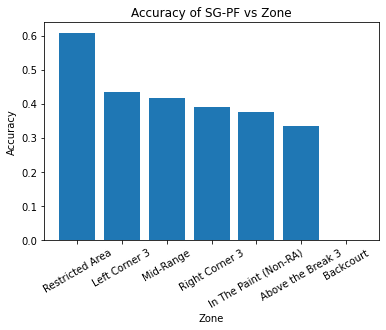

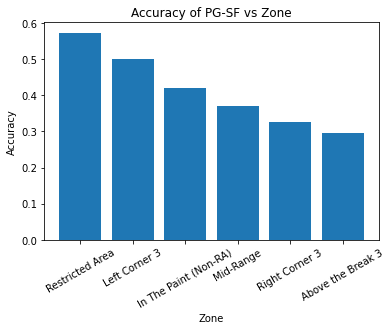

In [113]:
pos = df.groupby(['POSITION', 'BASIC_ZONE'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
pos.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
pos = pos.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
# pos = pos[pos['shots']>=100]
for pg in df['POSITION'].unique():
    model = pos[(pos['POSITION']==pg)]
    plt.bar(model['BASIC_ZONE'], model["Accuracy"], label = f'{pg}')
    plt.title(f"Accuracy of {pg} vs Zone")
    plt.xlabel("Zone")
    plt.ylabel("Accuracy")
    plt.xticks(rotation=30)
# plt.legend()
    plt.show()

## 7. Time in Game

In [115]:
time_stats = df[df['TIME_LEFT_GAME']>=0].groupby(['TIME_LEFT_GAME'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
time_stats.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
time_stats= time_stats.sort_values('Accuracy').reset_index(drop=True)
time_stats

,TIME_LEFT_GAME,Frequency,Accuracy
0,3420,4,0.000000
1,3419,1,0.000000
2,1617,1,0.000000
3,3418,5,0.200000
4,1616,5,0.200000
...,...,...,...
2876,719,3,0.666667
2877,2516,6,0.666667
2878,2517,2,1.000000
2879,2518,3,1.000000


In [120]:
def game_time(x):
    q = 4-int(x/720)
    m = int((x%720)/60)
    s = (x%720)%60

    return q,m,s

In [123]:
sorted_time_stats = time_stats[time_stats['Frequency']>=100]
sorted_time_stats=sorted_time_stats.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
sorted_time_stats[['QUARTER', 'MINS_LEFT', 'SECS_LEFT']] = sorted_time_stats['TIME_LEFT_GAME'].apply(lambda x: pd.Series(game_time(x)))
sorted_time_stats = sorted_time_stats[['TIME_LEFT_GAME','QUARTER', 'MINS_LEFT', 'SECS_LEFT','Frequency','Accuracy']]
sorted_time_stats

,TIME_LEFT_GAME,QUARTER,MINS_LEFT,SECS_LEFT,Frequency,Accuracy
0,3414,0,8,54,126,0.619048
1,1860,2,7,0,1707,0.608084
2,2760,1,10,0,1786,0.582307
3,960,3,4,0,1715,0.570262
4,712,4,11,52,110,0.563636
...,...,...,...,...,...,...
2848,1,4,0,1,2570,0.259533
2849,0,4,0,0,5367,0.247624
2850,1800,2,6,0,14971,0.220693
2851,2700,1,9,0,14726,0.214315


In [122]:
time_stats[['QUARTER', 'MINS_LEFT', 'SECS_LEFT']] = time_stats['TIME_LEFT_GAME'].apply(lambda x: pd.Series(game_time(x)))


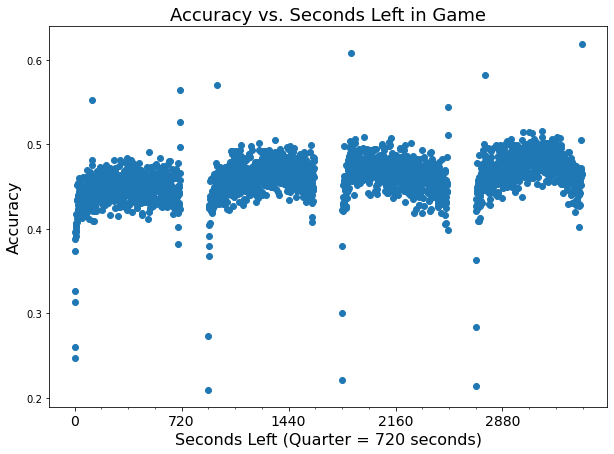

In [139]:
plt.figure(figsize=(10,7))
plt.scatter(sorted_time_stats["TIME_LEFT_GAME"],sorted_time_stats["Accuracy"])

plt.xlabel('Seconds Left (Quarter = 720 seconds)', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy vs. Seconds Left in Game', fontsize=18)

plt.xticks(ticks=range(0, 2901 + 1, 180), labels=range(0, 2901 + 1, 180))
plt.xticks(ticks=range(0, 2901 + 1, 720), labels=range(0, 2901 + 1, 720), fontsize=16)
major_locator = MultipleLocator(180)
minor_locator = MultipleLocator(720)

plt.gca().xaxis.set_major_locator(minor_locator)
plt.gca().xaxis.set_minor_locator(major_locator)
plt.xticks(fontsize=14)
plt.show()

In [124]:
print("Quarter and Time Left in Quarter: Lowest Accuracies")
sorted_time_stats[['QUARTER', 'MINS_LEFT', 'SECS_LEFT','Frequency','Accuracy']].tail(15)

Quarter and Time Left in Quarter: Lowest Accuracies


,QUARTER,MINS_LEFT,SECS_LEFT,Frequency,Accuracy
2838,2,6,2,3412,0.379836
2839,3,3,3,2397,0.379641
2840,4,0,4,1591,0.373979
2841,3,3,2,3382,0.367238
2842,1,9,2,3417,0.363184
2843,4,0,3,1735,0.326225
2844,4,0,2,1959,0.313425
2845,2,6,1,5862,0.300239
2846,1,9,1,5653,0.284274
2847,3,3,1,5833,0.272758


In [137]:
sorted_time_stats.head(10)

,TIME_LEFT_GAME,QUARTER,MINS_LEFT,SECS_LEFT,Frequency,Accuracy
0,3414,0,8,54,126,0.619048
1,1860,2,7,0,1707,0.608084
2,2760,1,10,0,1786,0.582307
3,960,3,4,0,1715,0.570262
4,712,4,11,52,110,0.563636
5,120,4,2,0,1611,0.552452
6,2512,1,5,52,101,0.544554
7,711,4,11,51,230,0.526087
8,3149,0,4,29,1458,0.515089
9,3020,0,2,20,1433,0.515003


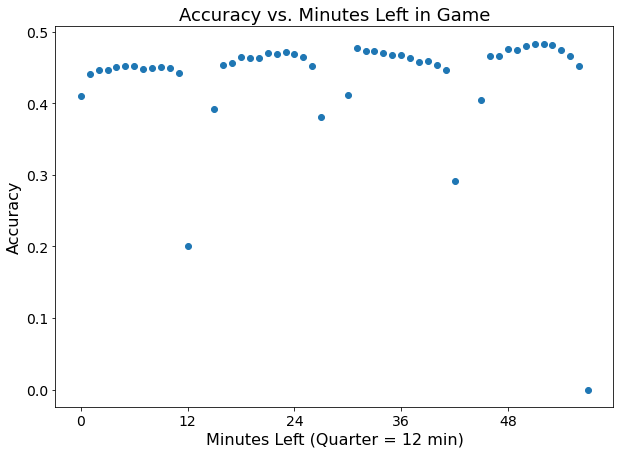

In [136]:
from matplotlib.ticker import MultipleLocator
mins = df[df['TIME_LEFT_GAME']>=0].copy()
mins["min_left"]=(df['TIME_LEFT_GAME']/60).astype(int)
mins_stats = mins[mins['min_left']>=0].groupby(['min_left'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
mins_stats.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)

plt.figure(figsize=(10,7))
plt.scatter(mins_stats['min_left'],mins_stats['Accuracy'])
plt.xticks(np.arange(0, 50, step=12),fontsize=14)

plt.xlabel('Minutes Left (Quarter = 12 min)', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy vs. Minutes Left in Game', fontsize=18)
plt.yticks(fontsize=14)

plt.show()

## 8. ACTION_TYPE, BASIC_ZONE, POSITION

In [140]:
shot_stats = df.groupby(['ACTION_TYPE', 'BASIC_ZONE', 'POSITION'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
shot_stats.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
sorted_shot_stats = shot_stats.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

sorted_shot_stats[sorted_shot_stats['Frequency']>=100]

,ACTION_TYPE,BASIC_ZONE,POSITION,Frequency,Accuracy
346,Reverse Slam Dunk Shot,Restricted Area,C,103,0.990291
347,Running Slam Dunk Shot,Restricted Area,PF,334,0.988024
348,Running Slam Dunk Shot,Restricted Area,C,242,0.987603
349,Running Slam Dunk Shot,Restricted Area,SG,185,0.983784
350,Slam Dunk Shot,Restricted Area,C-PF,159,0.981132
...,...,...,...,...,...
2124,Jump Shot,Backcourt,SG,1710,0.015789
2125,Jump Shot,Backcourt,PG,2211,0.015378
2126,Jump Shot,Backcourt,PF,920,0.013043
2127,Running Jump Shot,Backcourt,SF,181,0.011050


In [141]:
print("Lowest Percentage Shots Excluding Backcourt:")
sorted_shot_stats[(sorted_shot_stats['Frequency']>=100)&(sorted_shot_stats['BASIC_ZONE']!='Backcourt')].tail(10)

Lowest Percentage Shots Excluding Backcourt:


,ACTION_TYPE,BASIC_ZONE,POSITION,Frequency,Accuracy
2037,Jump Shot,In The Paint (Non-RA),SG-PF,131,0.221374
2039,Jump Shot,In The Paint (Non-RA),SF-PF,396,0.212121
2043,Driving Layup Shot,In The Paint (Non-RA),SG-PG,119,0.210084
2044,Turnaround Jump Shot,Above the Break 3,PF,100,0.210000
2063,Jump Shot,In The Paint (Non-RA),PG-SG,524,0.192748
2066,Jump Shot,Restricted Area,SF,4891,0.185647
2070,Driving Layup Shot,In The Paint (Non-RA),SF-SG,119,0.168067
2082,Jump Shot,Restricted Area,SG,4732,0.154903
2092,Driving Layup Shot,Mid-Range,SG,156,0.134615
2093,Jump Shot,Restricted Area,PG,4883,0.128814


## 9. Action Type and Action Group

### 9a. ACTION_TYPE

In [142]:
action_type_stats = df.groupby(['ACTION_TYPE'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
action_type_stats.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
action_type_stats = action_type_stats.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
action_type_stats#[action_type_stats['shots']>=100]

,ACTION_TYPE,Frequency,Accuracy
0,Running Slam Dunk Shot,1109,0.982867
1,Slam Dunk Shot,23562,0.978992
2,Driving Slam Dunk Shot,3680,0.969565
3,Reverse Slam Dunk Shot,429,0.960373
4,Running Reverse Dunk Shot,164,0.951220
...,...,...,...
65,Step Back Jump shot,74020,0.437220
66,Driving Floating Jump Shot,54889,0.433165
67,Running Pull-Up Jump Shot,9641,0.424956
68,Driving Jump shot,7764,0.420015


In [143]:
action_type_stats.sort_values(by='Frequency', ascending=False).reset_index(drop=True).head(10)

,ACTION_TYPE,Frequency,Accuracy
0,Jump Shot,1939362,0.344609
1,Layup Shot,432431,0.463586
2,Driving Layup Shot,269168,0.605644
3,Pullup Jump shot,206034,0.462996
4,Step Back Jump shot,74020,0.437220
5,Turnaround Jump Shot,67999,0.474036
6,Dunk Shot,66382,0.870070
7,Hook Shot,64435,0.449181
8,Running Jump Shot,62862,0.483504
9,Fadeaway Jump Shot,59985,0.477703


### 9b. Create ACTION_GROUP

In [6]:
import re
def extract_action_group(input_strings):
    # Define the regex pattern to capture the last two words
    pattern = re.compile(r'\b(\w+ shot)\b')

    result_list = []

    for input_string in input_strings:
        # Search for the pattern in the input string
#         print(input_string)
        match = pattern.search(input_string.lower())

        if match:
            # Extract the captured group (last two words)
            last_two_words = match.group(1)


            # Check if the last three words are "Finger Roll Shot"
            if len(input_string.lower().split()) >= 3 and input_string.lower().split()[-3:] == ["finger", "roll", "shot"]:
                result_list.append("finger roll shot")
            else:
                # Extract the last two words
                result_list.append(last_two_words)
        else: result_list.append("DNE")

    return result_list
df["ACTION_GROUP"] = extract_action_group(df["ACTION_TYPE"])

### 9c. Compare ACTION_GROUP vs ACTION_TYPE

In [27]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(df['ACTION_TYPE']), df['SHOT_MADE'], test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy for Type: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')


C:\Users\josh1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Type: 0.6284907534208168
Confusion Matrix:
[[384280  51499]
 [246642 120092]]
Classification Report:
              precision    recall  f1-score   support

       False       0.61      0.88      0.72    435779
        True       0.70      0.33      0.45    366734

    accuracy                           0.63    802513
   macro avg       0.65      0.60      0.58    802513
weighted avg       0.65      0.63      0.60    802513



In [26]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(df['ACTION_GROUP']), df['SHOT_MADE'], test_size=0.2, random_state=42)

# Fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy for Group: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy for Group: 0.6179388994321587
Confusion Matrix:
[[340600  95179]
 [211430 155304]]
Classification Report:
              precision    recall  f1-score   support

       False       0.62      0.78      0.69    435779
        True       0.62      0.42      0.50    366734

    accuracy                           0.62    802513
   macro avg       0.62      0.60      0.60    802513
weighted avg       0.62      0.62      0.60    802513



In [25]:
np.random.seed(42)
categories = [f'Category_{i}' for i in range(1, len(df['ACTION_GROUP'].unique())+1)]

# Fit logistic regression model
X = pd.get_dummies(df['ACTION_GROUP'], drop_first=True)  # Drop one category to avoid multicollinearity
X = sm.add_constant(X)  # Add a constant for the intercept
y = df['SHOT_MADE']

model = sm.Logit(y, X)
result = model.fit()

# Display the result summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.650530
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              SHOT_MADE   No. Observations:              4012561
Model:                          Logit   Df Residuals:                  4012552
Method:                           MLE   Df Model:                            8
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                 0.05639
Time:                        15:35:23   Log-Likelihood:            -2.6103e+06
converged:                       True   LL-Null:                   -2.7663e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6428      0.010     64.648      0.000       0.623       0.662
dunk shot  

In [15]:
np.random.seed(42)
categories = [f'Category_{i}' for i in range(1, len(df['ACTION_TYPE'].unique())+1)]

# Fit logistic regression model
X = pd.get_dummies(df['ACTION_TYPE'], drop_first=True)  # Drop one category to avoid multicollinearity
X = sm.add_constant(X)  # Add a constant for the intercept
y = df['SHOT_MADE']

model = sm.Logit(y, X)
result = model.fit()

# Display the result summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.641208
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              SHOT_MADE   No. Observations:              4012561
Model:                          Logit   Df Residuals:                  4012491
Method:                           MLE   Df Model:                           69
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                 0.06991
Time:                        15:29:58   Log-Likelihood:            -2.5729e+06
converged:                       True   LL-Null:                   -2.7663e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  2.2222      0.021    

### 9d. ACTION_GROUP Analysis

In [150]:
action_gp_stats = df.groupby(['ACTION_GROUP'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
action_gp_stats.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
action_gp_stats = action_gp_stats.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
action_gp_stats= action_gp_stats[action_gp_stats['ACTION_GROUP']!='no shot']

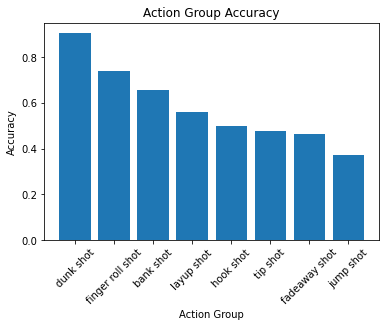

In [151]:
plt.bar(action_gp_stats['ACTION_GROUP'],action_gp_stats['Accuracy'])
plt.xlabel("Action Group")
plt.ylabel("Accuracy")
plt.title("Action Group Accuracy")
plt.xticks(rotation=45)
plt.show()

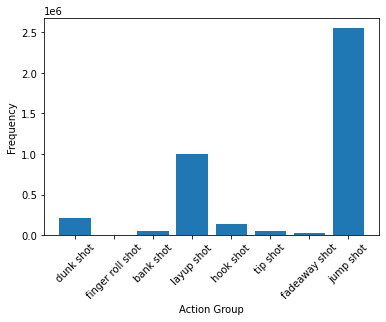

In [152]:
plt.bar(action_gp_stats['ACTION_GROUP'],action_gp_stats['Frequency'])
plt.xlabel("Action Group")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [154]:
action_gp_stats.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

,ACTION_GROUP,Frequency,Accuracy
0,jump shot,2555764,0.373759
1,layup shot,995837,0.559866
2,dunk shot,206777,0.905309
3,hook shot,130044,0.497908
4,tip shot,47027,0.475195
5,bank shot,44786,0.655383
6,fadeaway shot,27071,0.462524
7,finger roll shot,5174,0.738500


In [172]:
zone_action = df.groupby(['BASIC_ZONE','ACTION_GROUP'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
zone_action.rename(columns={'count': 'Frequency', 'mean': 'Accuracy'}, inplace=True)
zone_action = zone_action.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

za = zone_action[zone_action['Frequency']>=100]
zone_action.head()

,BASIC_ZONE,ACTION_GROUP,Frequency,Accuracy
0,Above the Break 3,dunk shot,2,1.000000
1,Restricted Area,dunk shot,204838,0.907981
2,Restricted Area,finger roll shot,4415,0.758324
3,Restricted Area,bank shot,3987,0.740657
4,In The Paint (Non-RA),bank shot,21132,0.687252


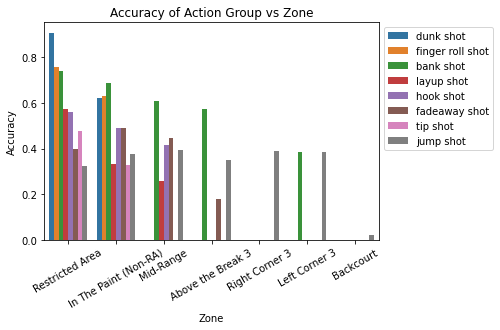

In [171]:
sns.barplot(x='BASIC_ZONE', y='Accuracy', hue='ACTION_GROUP', data=za)
plt.title(f"Accuracy of Action Group vs Zone")
plt.xlabel("Zone")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
# plt.legend(bar, df['POSITION_GROUP'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Basic Zone

In [63]:
zone_stats = df.groupby(['BASIC_ZONE'])['SHOT_MADE'].agg(['count', 'mean']).reset_index()
zone_stats.rename(columns={'count': 'shots', 'mean': 'percentage_made'}, inplace=True)
zone_stats = zone_stats.sort_values(by='percentage_made', ascending=False).reset_index(drop=True)
zone_stats

,BASIC_ZONE,shots,percentage_made
0,Restricted Area,1279336,0.613490
1,In The Paint (Non-RA),601090,0.406535
2,Mid-Range,1013252,0.398207
3,Right Corner 3,136096,0.387814
4,Left Corner 3,148133,0.386362
5,Above the Break 3,826267,0.350833
6,Backcourt,8387,0.024800
